In [257]:
import requests 
import matplotlib.pyplot as plt
import pandas as pd


In [269]:
# API call
url = 'https://api.cryptonator.com/api/full/'
try:
    base_currency = input ('Enter Your Desired CryptoCurrency')
    target_currency = input ('Enter Your Target_Currency')
    params = (base_currency+'-'+target_currency)
    data_call = requests.get(url+params)
    result = data_call.json()['ticker']['markets']
    
except:
    print ("Sorry, your listed currency isn't available")


Enter Your Desired CryptoCurrencyxrp
Enter Your Target_Currencyusd


In [270]:
# DataFrame 
grid = pd.DataFrame(result)
grid

,market,price,volume
0,BitFinex,0.68789000,4.459819e+07
1,Bittrex,0.68730016,4.550977e+06
2,Exmo,0.73620000,2.521625e+06
3,Hitbtc,0.73100000,1.422972e+06
4,Kraken,0.68840000,1.274747e+07
5,Poloniex,0.69000000,6.006265e+06


In [271]:
#Finding Best Possible Buying and Selling Price considering exchange should have good volume transfer e.g: 1000+
filter_data=grid[grid['volume'] > 1000]

proposed_buying_exchange=filter_data.loc[filter_data['price'].idxmin()]
proposed_selling_exchange=filter_data.loc[filter_data['price'].idxmax()]

print (str(proposed_buying_exchange)+ '\n\n' +str(proposed_selling_exchange))

market        Bittrex
price      0.68730016
volume    4.55098e+06
Name: 1, dtype: object

market           Exmo
price      0.73620000
volume    2.52162e+06
Name: 2, dtype: object


In [272]:
profit = 0
profit = float(proposed_selling_exchange['price'])-float(proposed_buying_exchange['price'])
round(profit)

0

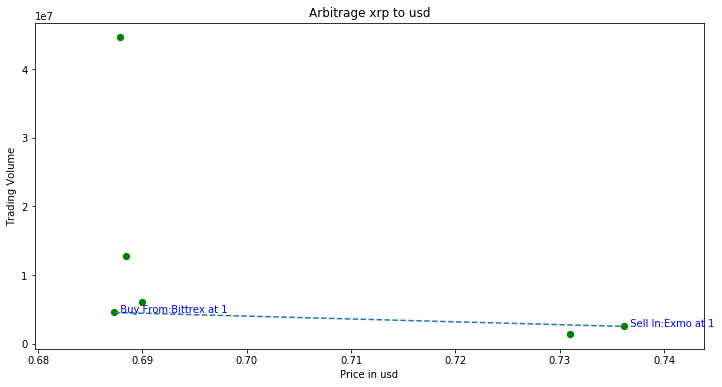

In [273]:
fig = plt.figure(figsize=(12,6))
chart = fig.add_subplot(111)
chart.scatter(grid['price'],grid['volume'],c = 'green', s= 40)
chart.set_title('Arbitrage '+ base_currency + ' to ' + target_currency)
chart.set_ylabel('Trading Volume')
chart.set_xlabel('Price in '+ target_currency)
chart.annotate('  Buy From:'+proposed_buying_exchange['market']+ ' at '+ str(round(float(proposed_buying_exchange['price']))), xy=(proposed_buying_exchange['price'],proposed_buying_exchange['volume']),color='blue')               
chart.annotate('  Sell In:'+proposed_selling_exchange['market']+ ' at '+ str(round(float(proposed_selling_exchange['price']))), xy=(proposed_selling_exchange['price'],proposed_selling_exchange['volume']),color='blue')
plt.plot((proposed_buying_exchange['price'],proposed_selling_exchange['price']),(proposed_buying_exchange['volume'],proposed_selling_exchange['volume']),linestyle = 'dashed')               
plt.show()